Session 7
===

Today we'll dig deeper into Python's iteration protocol, which offers a very powerful mechanism for traversing collections of data. In general, there are lots and lots of cases where we need code that does calculations on collections of data, and this is especially true when we're developing code for data analysis.

In our analytical work, it's extremely common for use to encounter things like
 * Tabular data with many rows and columns
 * Numerous files, each one containing the results of a single analysis
 * Streams of data, either arriving as text or from instrumentation
In all these cases, we need to *iterate* over the data sets.


What we've seen so far...
---
Up to now, we've taken a very simplistic approach to iteration, using simple looping structures. Today, we'll review those and then talk about more-advanced mechanisms that Python uses for iteration. This yields some powerful constructs that can make your code faster, smaller, less error-prone, and -- most importantly -- more expressive and easier to read.

A recurring theme
---
A recurring theme we have seen is making a new collection based on data in an input collection.

In [19]:
# Here's some input data
input_list = [-9, -4, 8, 0, 22, -1, 7, -4, 9, 0,]
label_list = ['A', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
world_series_winners = {
              2014: 'Giants',
              2015: 'Royals',
              2002: 'Angels',
              2016: 'Cubs',
              2009: 'Yankees',
              2017: 'Astros',
              2011: 'Cardinals',
              2018: 'Red Sox',
              2019: 'Nationals',
              1988: 'Dodgers',
              2001: 'Diamondbacks',
              }

In [2]:
# Make a list of the square of the values in `input_list`

output_list = []
for i in input_list:
    output_list.append(i * i)

print('The squares are', output_list)

The squares are [81, 16, 64, 0, 484, 1, 49, 16, 81, 0]


In [10]:
# We have also traversed dictionaries by their keys
for year in world_series_winners:
    print(world_series_winners[year])

Giants
Royals
Angels
Cubs
Yankees
Astros
Cardinals
Red Sox
Nationals
Dodgers
Diamondbacks


In [4]:
# It's also possible to loop over dictionary values
for team in world_series_winners.values():
    print(team)

Giants
Royals
Angels
Cubs
Yankees
Astros
Cardinals
Red Sox
Nationals
Dodgers
Diamondbacks


In [9]:
# We also have seen looping over key-value pairs using items()
for year, team in world_series_winners.items():
    print(year, team)

2014 Giants
2015 Royals
2002 Angels
2016 Cubs
2009 Yankees
2017 Astros
2011 Cardinals
2018 Red Sox
2019 Nationals
1988 Dodgers
2001 Diamondbacks


List Comprehensions
---
Let's look at these examples using a new type of expression, a *list comprehension*.

In [11]:
squares = []
for i in input_list:
    squares.append(i * i)
print(squares)

[81, 16, 64, 0, 484, 1, 49, 16, 81, 0]


In [12]:
squares = [ i * i for i in input_list ]

print(squares)

[81, 16, 64, 0, 484, 1, 49, 16, 81, 0]


In [14]:
sum_of_squares = sum( [ i * i for i in input_list ] )
sum_of_squares

792

The `zip` function
---

`zip` weaves two (or more) sequences into a sequence of tuples


In [20]:
for tu in zip(label_list, input_list):
    print(tu)

('A', -9)
('A', -4)
('C', 8)
('D', 0)
('E', 22)
('F', -1)
('G', 7)
('H', -4)
('I', 9)
('J', 0)


Dictionary comprehension
---
A dictionary comprehension builds a dictionary from keys and values

In [21]:
my_dict = { k: v for k, v in zip(label_list, input_list) }
my_dict
    

{'A': -4, 'C': 8, 'D': 0, 'E': 22, 'F': -1, 'G': 7, 'H': -4, 'I': 9, 'J': 0}

Another recurring theme
---
Another pattern we've seen a lot so far is accumulating values from an iterable sequence.

In [22]:
# Calculate the sum of squares
sum_of_squares = 0
for i in input_list:
    sum_of_squares += i * i
print('The sum of squares is', sum_of_squares)

The sum of squares is 792


Where we're heading: A generic approach to looping over data
---
Python's iterator protocol provides a very generic approach to looping over data. One interesting feature is that the approach lets us traverse large data sets efficiently, even occasionally allowing us to do so without ever loading the entire dataset into memory!

Iteration archetype: the `range` function
---
Up to now, all our looping structures have traversed collections that are already populated with data. What if we want to loop over a sequence of integers from 0 to 9? We do this with the `range` function. 

In [23]:
# Values from range() use the same values as for slicing text or lists
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [24]:
# We can also make a range from one value to another
for i in range(-5, 5):
    print(i)

-5
-4
-3
-2
-1
0
1
2
3
4


In [25]:
# We can also skip entries...
for i in range(-5, 5, 2):
    print(i)

-5
-3
-1
1
3


But let's take a closer look. Let's create a variable and assign a range of entries to it. Note: this code may not do what you expect!

In [26]:
# Make a range from 0 to 3
my_range = range(4)
print(my_range)

range(0, 4)


You might have expected to see a list there! It's not. It's a `range` object...

In [27]:
type(my_range)

range

A `range` object is an object called a *generator*. Generators are a special kind of object that supports iteration. Under the hood, this is implemented very simply. A generator yields up a value from the sequence each time we go through a `for` loop. 

In [28]:
for i in my_range:
    print(i)

0
1
2
3


How it works, and how we can take advantage
---
What's special is that the `range` object never actually creates a list of the values in the range. So a range over ten million integers takes exactly the same amount of memory used for a range of four integers. This is a powerful idea, and Python allows us to write our own generators by providing the `yield` keyword. A function that utilizes `yield` is automatically a generator function. When the function is accessed again while processing the `for` loop, execution proceeds from the statement after the `yield`.

Let's use the `while` loop to make our own `range` function:

In [29]:
def range_generator(end_value):
    '''
    Creates a simple range() function using our own generator
    '''
    current_value = 0
    while True:
        yield current_value
        current_value += 1
        if current_value == end_value:
            break

In [30]:
for i in range_generator(4):
    print(i)

0
1
2
3


In [31]:
type(range_generator(4))

generator

Isn't that neat?
---
I'll accept that you may not find that very interesting... Let's create a more-useful generator and have a look at Moby Dick. We're now going to write a generator that automatically processes the file, yielding up each of the words in the book, in sequence.

In [33]:
# Process "Moby-Dick"... removing the Chapter and Epliogue headings along the way...
# also force lower case and remove punctuation

with open('moby-dick.txt', 'r', encoding='UTF-8') as input_file:
    clean_text = []
    for line in input_file:
        line = ( line.strip()
                     .lower()
                     .replace('.', '')
                     .replace('-', ' ')
                     .replace(',', '')
                     .replace("'", '')
                     .replace('"', '')
                     .replace('“', '')
                     .replace('_', '')
                     .replace('?', '')
                     .replace('!', '')
                     .replace(':', '')
                     .replace(';', '')
               )
        
        if line.startswith('chapter') or line.startswith('epilogue'):
            # 'continue' finishes this pass through the loop
            continue
            
        if len(line) == 0:
            continue
            
        clean_text.append(line)
        


Let's convert it into a generator...

In [34]:
# Here's a generator for processing ANY book, one word at a time...

def words(book):
    '''
    Generator that yields each of the words in the book provided
    '''
    with open(book, 'r', encoding='UTF-8') as input_file:
        for line in input_file:
            line = ( line.strip()
                         .lower()
                         .replace('.', '')
                         .replace('-', ' ')
                         .replace(',', '')
                         .replace("'", '')
                         .replace('"', '')
                         .replace('“', '')
                         .replace('_', '')
                         .replace('?', '')
                         .replace('!', '')
                         .replace(':', '')
                         .replace(';', '')
                         .replace('&', '')
                   )

            if line.startswith('chapter') or line.startswith('epilogue'):
                # 'continue' finishes this pass through the loop
                continue

            if len(line) == 0:
                continue

            for word in line.split():
                yield word

In [35]:
for word in words('moby-dick.txt'):
    print(word)

call
me
ishmael
some
years
ago
never
mind
how
long
precisely
having
little
or
no
money
in
my
purse
and
nothing
particular
to
interest
me
on
shore
i
thought
i
would
sail
about
a
little
and
see
the
watery
part
of
the
world
it
is
a
way
i
have
of
driving
off
the
spleen
and
regulating
the
circulation
whenever
i
find
myself
growing
grim
about
the
mouth
whenever
it
is
a
damp
drizzly
november
in
my
soul
whenever
i
find
myself
involuntarily
pausing
before
coffin
warehouses
and
bringing
up
the
rear
of
every
funeral
i
meet
and
especially
whenever
my
hypos
get
such
an
upper
hand
of
me
that
it
requires
a
strong
moral
principle
to
prevent
me
from
deliberately
stepping
into
the
street
and
methodically
knocking
peoples
hats
off
then
i
account
it
high
time
to
get
to
sea
as
soon
as
i
can
this
is
my
substitute
for
pistol
and
ball
with
a
philosophical
flourish
cato
throws
himself
upon
his
sword
i
quietly
take
to
the
ship
there
is
nothing
surprising
in
this
if
they
but
knew
it
almost
all
men
in
their
degre

i
for
one
had
no
idea
of
so
doing
for
my
mind
was
made
up
to
sail
in
no
other
than
a
nantucket
craft
because
there
was
a
fine
boisterous
something
about
everything
connected
with
that
famous
old
island
which
amazingly
pleased
me
besides
though
new
bedford
has
of
late
been
gradually
monopolising
the
business
of
whaling
and
though
in
this
matter
poor
old
nantucket
is
now
much
behind
her
yet
nantucket
was
her
great
original
the
tyre
of
this
carthage
the
place
where
the
first
dead
american
whale
was
stranded
where
else
but
from
nantucket
did
those
aboriginal
whalemen
the
red
men
first
sally
out
in
canoes
to
give
chase
to
the
leviathan
and
where
but
from
nantucket
too
did
that
first
adventurous
little
sloop
put
forth
partly
laden
with
imported
cobblestones
so
goes
the
story
to
throw
at
the
whales
in
order
to
discover
when
they
were
nigh
enough
to
risk
a
harpoon
from
the
bowsprit
now
having
a
night
a
day
and
still
another
night
following
before
me
in
new
bedford
ere
i
could
embark
for
my
des

so
all
right
take
a
seat
supper
you
want
supper
supperll
be
ready
directly”
i
sat
down
on
an
old
wooden
settle
carved
all
over
like
a
bench
on
the
battery
at
one
end
a
ruminating
tar
was
still
further
adorning
it
with
his
jack
knife
stooping
over
and
diligently
working
away
at
the
space
between
his
legs
he
was
trying
his
hand
at
a
ship
under
full
sail
but
he
didnt
make
much
headway
i
thought
at
last
some
four
or
five
of
us
were
summoned
to
our
meal
in
an
adjoining
room
it
was
cold
as
iceland
no
fire
at
all
the
landlord
said
he
couldnt
afford
it
nothing
but
two
dismal
tallow
candles
each
in
a
winding
sheet
we
were
fain
to
button
up
our
monkey
jackets
and
hold
to
our
lips
cups
of
scalding
tea
with
our
half
frozen
fingers
but
the
fare
was
of
the
most
substantial
kind
not
only
meat
and
potatoes
but
dumplings
good
heavens
dumplings
for
supper
one
young
fellow
in
a
green
box
coat
addressed
himself
to
these
dumplings
in
a
most
direful
manner
my
boy”
said
the
landlord
youll
have
the
nightmare


night
and
somehow
sam
got
pitched
on
the
floor
and
came
near
breaking
his
arm
arter
that
sal
said
it
wouldnt
do
come
along
here
ill
give
ye
a
glim
in
a
jiffy”
and
so
saying
he
lighted
a
candle
and
held
it
towards
me
offering
to
lead
the
way
but
i
stood
irresolute
when
looking
at
a
clock
in
the
corner
he
exclaimed
i
vum
its
sunday
you
wont
see
that
harpooneer
to
night
hes
come
to
anchor
somewhere
come
along
then
do
come
wont
ye
come”
i
considered
the
matter
a
moment
and
then
up
stairs
we
went
and
i
was
ushered
into
a
small
room
cold
as
a
clam
and
furnished
sure
enough
with
a
prodigious
bed
almost
big
enough
indeed
for
any
four
harpooneers
to
sleep
abreast
there”
said
the
landlord
placing
the
candle
on
a
crazy
old
sea
chest
that
did
double
duty
as
a
wash
stand
and
centre
table
there
make
yourself
comfortable
now
and
good
night
to
ye”
i
turned
round
from
eyeing
the
bed
but
he
had
disappeared
folding
back
the
counterpane
i
stooped
over
the
bed
though
none
of
the
most
elegant
it
yet
stood
t

to
one
side
he
really
did
this
in
not
only
a
civil
but
a
really
kind
and
charitable
way
i
stood
looking
at
him
a
moment
for
all
his
tattooings
he
was
on
the
whole
a
clean
comely
looking
cannibal
whats
all
this
fuss
i
have
been
making
about
thought
i
to
myself
the
mans
a
human
being
just
as
i
am
he
has
just
as
much
reason
to
fear
me
as
i
have
to
be
afraid
of
him
better
sleep
with
a
sober
cannibal
than
a
drunken
christian
landlord”
said
i
tell
him
to
stash
his
tomahawk
there
or
pipe
or
whatever
you
call
it
tell
him
to
stop
smoking
in
short
and
i
will
turn
in
with
him
but
i
dont
fancy
having
a
man
smoking
in
bed
with
me
its
dangerous
besides
i
aint
insured”
this
being
told
to
queequeg
he
at
once
complied
and
again
politely
motioned
me
to
get
into
bed
rolling
over
to
one
side
as
much
as
to
say
i
wont
touch
a
leg
of
ye”
good
night
landlord”
said
i
you
may
go”
i
turned
in
and
never
slept
better
in
my
life
upon
waking
next
morning
about
daylight
i
found
queequegs
arm
thrown
over
me
in
the
mos

table
and
i
was
preparing
to
hear
some
good
stories
about
whaling
to
my
no
small
surprise
nearly
every
man
maintained
a
profound
silence
and
not
only
that
but
they
looked
embarrassed
yes
here
were
a
set
of
sea
dogs
many
of
whom
without
the
slightest
bashfulness
had
boarded
great
whales
on
the
high
seas
entire
strangers
to
them
and
duelled
them
dead
without
winking
and
yet
here
they
sat
at
a
social
breakfast
table
all
of
the
same
calling
all
of
kindred
tastes
looking
round
as
sheepishly
at
each
other
as
though
they
had
never
been
out
of
sight
of
some
sheepfold
among
the
green
mountains
a
curious
sight
these
bashful
bears
these
timid
warrior
whalemen
but
as
for
queequeg
why
queequeg
sat
there
among
them
at
the
head
of
the
table
too
it
so
chanced
as
cool
as
an
icicle
to
be
sure
i
cannot
say
much
for
his
breeding
his
greatest
admirer
could
not
have
cordially
justified
his
bringing
his
harpoon
into
breakfast
with
him
and
using
it
there
without
ceremony
reaching
over
the
table
with
it
to
the

overshoes
were
one
by
one
removed
and
hung
up
in
a
little
space
in
an
adjacent
corner
when
arrayed
in
a
decent
suit
he
quietly
approached
the
pulpit
like
most
old
fashioned
pulpits
it
was
a
very
lofty
one
and
since
a
regular
stairs
to
such
a
height
would
by
its
long
angle
with
the
floor
seriously
contract
the
already
small
area
of
the
chapel
the
architect
it
seemed
had
acted
upon
the
hint
of
father
mapple
and
finished
the
pulpit
without
a
stairs
substituting
a
perpendicular
side
ladder
like
those
used
in
mounting
a
ship
from
a
boat
at
sea
the
wife
of
a
whaling
captain
had
provided
the
chapel
with
a
handsome
pair
of
red
worsted
man
ropes
for
this
ladder
which
being
itself
nicely
headed
and
stained
with
a
mahogany
colour
the
whole
contrivance
considering
what
manner
of
chapel
it
was
seemed
by
no
means
in
bad
taste
halting
for
an
instant
at
the
foot
of
the
ladder
and
with
both
hands
grasping
the
ornamental
knobs
of
the
man
ropes
father
mapple
cast
a
look
upwards
and
then
with
a
truly
sail

if
it
were
a
thing
not
to
be
overlooked
in
this
history
‘that
he
paid
the
fare
thereof
ere
the
craft
did
sail
and
taken
with
the
context
this
is
full
of
meaning
now
jonahs
captain
shipmates
was
one
whose
discernment
detects
crime
in
any
but
whose
cupidity
exposes
it
only
in
the
penniless
in
this
world
shipmates
sin
that
pays
its
way
can
travel
freely
and
without
a
passport
whereas
virtue
if
a
pauper
is
stopped
at
all
frontiers
so
jonahs
captain
prepares
to
test
the
length
of
jonahs
purse
ere
he
judge
him
openly
he
charges
him
thrice
the
usual
sum
and
its
assented
to
then
the
captain
knows
that
jonah
is
a
fugitive
but
at
the
same
time
resolves
to
help
a
flight
that
paves
its
rear
with
gold
yet
when
jonah
fairly
takes
out
his
purse
prudent
suspicions
still
molest
the
captain
he
rings
every
coin
to
find
a
counterfeit
not
a
forger
any
way
he
mutters
and
jonah
is
put
down
for
his
passage
‘point
out
my
state
room
sir
says
jonah
now
‘im
travel
weary
i
need
sleep
‘thou
lookest
like
it
says
the

final
breath
o
father
chiefly
known
to
me
by
thy
rod
mortal
or
immortal
here
i
die
i
have
striven
to
be
thine
more
than
to
be
this
worlds
or
mine
own
yet
this
is
nothing
i
leave
eternity
to
thee
for
what
is
man
that
he
should
live
out
the
lifetime
of
his
god”
he
said
no
more
but
slowly
waving
a
benediction
covered
his
face
with
his
hands
and
so
remained
kneeling
till
all
the
people
had
departed
and
he
was
left
alone
in
the
place
returning
to
the
spouter
inn
from
the
chapel
i
found
queequeg
there
quite
alone
he
having
left
the
chapel
before
the
benediction
some
time
he
was
sitting
on
a
bench
before
the
fire
with
his
feet
on
the
stove
hearth
and
in
one
hand
was
holding
close
up
to
his
face
that
little
negro
idol
of
his
peering
hard
into
its
face
and
with
a
jack
knife
gently
whittling
away
at
its
nose
meanwhile
humming
to
himself
in
his
heathenish
way
but
being
now
interrupted
he
put
up
the
image
and
pretty
soon
going
to
the
table
took
up
a
large
book
there
and
placing
it
on
his
lap
began

us
a
blue
hanging
tester
of
smoke
illuminated
by
the
flame
of
the
new
lit
lamp
whether
it
was
that
this
undulating
tester
rolled
the
savage
away
to
far
distant
scenes
i
know
not
but
he
now
spoke
of
his
native
island
and
eager
to
hear
his
history
i
begged
him
to
go
on
and
tell
it
he
gladly
complied
though
at
the
time
i
but
ill
comprehended
not
a
few
of
his
words
yet
subsequent
disclosures
when
i
had
become
more
familiar
with
his
broken
phraseology
now
enable
me
to
present
the
whole
story
such
as
it
may
prove
in
the
mere
skeleton
i
give
queequeg
was
a
native
of
rokovoko
an
island
far
away
to
the
west
and
south
it
is
not
down
in
any
map
true
places
never
are
when
a
new
hatched
savage
running
wild
about
his
native
woodlands
in
a
grass
clout
followed
by
the
nibbling
goats
as
if
he
were
a
green
sapling
even
then
in
queequegs
ambitious
soul
lurked
a
strong
desire
to
see
something
more
of
christendom
than
a
specimen
whaler
or
two
his
father
was
a
high
chief
a
king
his
uncle
a
high
priest
and
o

so
mind
your
eye”
but
it
so
happened
just
then
that
it
was
high
time
for
the
captain
to
mind
his
own
eye
the
prodigious
strain
upon
the
main
sail
had
parted
the
weather
sheet
and
the
tremendous
boom
was
now
flying
from
side
to
side
completely
sweeping
the
entire
after
part
of
the
deck
the
poor
fellow
whom
queequeg
had
handled
so
roughly
was
swept
overboard
all
hands
were
in
a
panic
and
to
attempt
snatching
at
the
boom
to
stay
it
seemed
madness
it
flew
from
right
to
left
and
back
again
almost
in
one
ticking
of
a
watch
and
every
instant
seemed
on
the
point
of
snapping
into
splinters
nothing
was
done
and
nothing
seemed
capable
of
being
done
those
on
deck
rushed
towards
the
bows
and
stood
eyeing
the
boom
as
if
it
were
the
lower
jaw
of
an
exasperated
whale
in
the
midst
of
this
consternation
queequeg
dropped
deftly
to
his
knees
and
crawling
under
the
path
of
the
boom
whipped
hold
of
a
rope
secured
one
end
to
the
bulwarks
and
then
flinging
the
other
like
a
lasso
caught
it
round
the
boom
as
it

but
as
queequeg
was
about
to
precede
me
up
the
stairs
the
lady
reached
forth
her
arm
and
demanded
his
harpoon
she
allowed
no
harpoon
in
her
chambers
why
not”
said
i
every
true
whaleman
sleeps
with
his
harpoon
but
why
not”
because
its
dangerous”
says
she
ever
since
young
stiggs
coming
from
that
unfortnt
vyge
of
his
when
he
was
gone
four
years
and
a
half
with
only
three
barrels
of
ile
was
found
dead
in
my
first
floor
back
with
his
harpoon
in
his
side
ever
since
then
i
allow
no
boarders
to
take
sich
dangerous
weepons
in
their
rooms
at
night
so
mr
queequeg”
(for
she
had
learned
his
name)
i
will
just
take
this
here
iron
and
keep
it
for
you
till
morning
but
the
chowder
clam
or
cod
to
morrow
for
breakfast
men”
both”
says
i
and
lets
have
a
couple
of
smoked
herring
by
way
of
variety”
in
bed
we
concocted
our
plans
for
the
morrow
but
to
my
surprise
and
no
small
concern
queequeg
now
gave
me
to
understand
that
he
had
been
diligently
consulting
yojo
the
name
of
his
black
little
god
and
yojo
had
told

sect
and
to
this
day
its
inhabitants
in
general
retain
in
an
uncommon
measure
the
peculiarities
of
the
quaker
only
variously
and
anomalously
modified
by
things
altogether
alien
and
heterogeneous
for
some
of
these
same
quakers
are
the
most
sanguinary
of
all
sailors
and
whale
hunters
they
are
fighting
quakers
they
are
quakers
with
a
vengeance
so
that
there
are
instances
among
them
of
men
who
named
with
scripture
names
a
singularly
common
fashion
on
the
island
and
in
childhood
naturally
imbibing
the
stately
dramatic
thee
and
thou
of
the
quaker
idiom
still
from
the
audacious
daring
and
boundless
adventure
of
their
subsequent
lives
strangely
blend
with
these
unoutgrown
peculiarities
a
thousand
bold
dashes
of
character
not
unworthy
a
scandinavian
sea
king
or
a
poetical
pagan
roman
and
when
these
things
unite
in
a
man
of
greatly
superior
natural
force
with
a
globular
brain
and
a
ponderous
heart
who
has
also
by
the
stillness
and
seclusion
of
many
long
night
watches
in
the
remotest
waters
and
b

at
last
the
squalls
gone
off
to
leeward
i
think
bildad
thou
used
to
be
good
at
sharpening
a
lance
mend
that
pen
will
ye
my
jack
knife
here
needs
the
grindstone
thats
he
thank
ye
bildad
now
then
my
young
man
ishmaels
thy
name
didnt
ye
say
well
then
down
ye
go
here
ishmael
for
the
three
hundredth
lay”
captain
peleg”
said
i
i
have
a
friend
with
me
who
wants
to
ship
too
shall
i
bring
him
down
to
morrow”
to
be
sure”
said
peleg
fetch
him
along
and
well
look
at
him”
what
lay
does
he
want”
groaned
bildad
glancing
up
from
the
book
in
which
he
had
again
been
burying
himself
oh
never
thee
mind
about
that
bildad”
said
peleg
has
he
ever
whaled
it
any”
turning
to
me
killed
more
whales
than
i
can
count
captain
peleg”
well
bring
him
along
then”
and
after
signing
the
papers
off
i
went
nothing
doubting
but
that
i
had
done
a
good
mornings
work
and
that
the
pequod
was
the
identical
ship
that
yojo
had
provided
to
carry
queequeg
and
me
round
the
cape
but
i
had
not
proceeded
far
when
i
began
to
bethink
me
th

go
to
bed
feeling
quite
sure
by
this
time
queequeg
must
certainly
have
brought
his
ramadan
to
a
termination
but
no
there
he
was
just
where
i
had
left
him
he
had
not
stirred
an
inch
i
began
to
grow
vexed
with
him
it
seemed
so
downright
senseless
and
insane
to
be
sitting
there
all
day
and
half
the
night
on
his
hams
in
a
cold
room
holding
a
piece
of
wood
on
his
head
for
heavens
sake
queequeg
get
up
and
shake
yourself
get
up
and
have
some
supper
youll
starve
youll
kill
yourself
queequeg”
but
not
a
word
did
he
reply
despairing
of
him
therefore
i
determined
to
go
to
bed
and
to
sleep
and
no
doubt
before
a
great
while
he
would
follow
me
but
previous
to
turning
in
i
took
my
heavy
bearskin
jacket
and
threw
it
over
him
as
it
promised
to
be
a
very
cold
night
and
he
had
nothing
but
his
ordinary
round
jacket
on
for
some
time
do
all
i
would
i
could
not
get
into
the
faintest
doze
i
had
blown
out
the
candle
and
the
mere
thought
of
queequeg
not
four
feet
off
sitting
there
in
that
uneasy
position
stark
a

to
save
all
hands
how
to
rig
jury
masts
how
to
get
into
the
nearest
port
that
was
what
i
was
thinking
of”
bildad
said
no
more
but
buttoning
up
his
coat
stalked
on
deck
where
we
followed
him
there
he
stood
very
quietly
overlooking
some
sailmakers
who
were
mending
a
top
sail
in
the
waist
now
and
then
he
stooped
to
pick
up
a
patch
or
save
an
end
of
tarred
twine
which
otherwise
might
have
been
wasted
shipmates
have
ye
shipped
in
that
ship”
queequeg
and
i
had
just
left
the
pequod
and
were
sauntering
away
from
the
water
for
the
moment
each
occupied
with
his
own
thoughts
when
the
above
words
were
put
to
us
by
a
stranger
who
pausing
before
us
levelled
his
massive
forefinger
at
the
vessel
in
question
he
was
but
shabbily
apparelled
in
faded
jacket
and
patched
trowsers
a
rag
of
a
black
handkerchief
investing
his
neck
a
confluent
small
pox
had
in
all
directions
flowed
over
his
face
and
left
it
like
the
complicated
ribbed
bed
of
a
torrent
when
the
rushing
waters
have
been
dried
up
have
ye
shipped
i

aboard”
hands
off
will
you”
said
i
lookee
here”
said
queequeg
shaking
himself
go
way”
aint
going
aboard
then”
yes
we
are”
said
i
but
what
business
is
that
of
yours
do
you
know
mr
elijah
that
i
consider
you
a
little
impertinent”
no
no
no
i
wasnt
aware
of
that”
said
elijah
slowly
and
wonderingly
looking
from
me
to
queequeg
with
the
most
unaccountable
glances
elijah”
said
i
you
will
oblige
my
friend
and
me
by
withdrawing
we
are
going
to
the
indian
and
pacific
oceans
and
would
prefer
not
to
be
detained”
ye
be
be
ye
coming
back
afore
breakfast”
hes
cracked
queequeg”
said
i
come
on”
holloa”
cried
stationary
elijah
hailing
us
when
we
had
removed
a
few
paces
never
mind
him”
said
i
queequeg
come
on”
but
he
stole
up
to
us
again
and
suddenly
clapping
his
hand
on
my
shoulder
said
did
ye
see
anything
looking
like
men
going
towards
that
ship
a
while
ago”
struck
by
this
plain
matter
of
fact
question
i
answered
saying
yes
i
thought
i
did
see
four
or
five
men
but
it
was
too
dim
to
be
sure”
very
dim
ver

murmured
old
bildad
almost
incoherently
i
hope
yell
have
fine
weather
now
so
that
captain
ahab
may
soon
be
moving
among
ye
a
pleasant
sun
is
all
he
needs
and
yell
have
plenty
of
them
in
the
tropic
voyage
ye
go
be
careful
in
the
hunt
ye
mates
dont
stave
the
boats
needlessly
ye
harpooneers
good
white
cedar
plank
is
raised
full
three
per
cent
within
the
year
dont
forget
your
prayers
either
mr
starbuck
mind
that
cooper
dont
waste
the
spare
staves
oh
the
sail
needles
are
in
the
green
locker
dont
whale
it
too
much
a
lords
days
men
but
dont
miss
a
fair
chance
either
thats
rejecting
heavens
good
gifts
have
an
eye
to
the
molasses
tierce
mr
stubb
it
was
a
little
leaky
i
thought
if
ye
touch
at
the
islands
mr
flask
beware
of
fornication
good
bye
good
bye
dont
keep
that
cheese
too
long
down
in
the
hold
mr
starbuck
itll
spoil
be
careful
with
the
butter
twenty
cents
the
pound
it
was
and
mind
ye
if
”
come
come
captain
bildad
stop
palavering
away”
and
with
that
peleg
hurried
him
over
the
side
and
both


find
any
precious
mss
in
my
desk
then
here
i
prospectively
ascribe
all
the
honor
and
the
glory
to
whaling
for
a
whale
ship
was
my
yale
college
and
my
harvard
in
behalf
of
the
dignity
of
whaling
i
would
fain
advance
naught
but
substantiated
facts
but
after
embattling
his
facts
an
advocate
who
should
wholly
suppress
a
not
unreasonable
surmise
which
might
tell
eloquently
upon
his
cause
such
an
advocate
would
he
not
be
blameworthy
it
is
well
known
that
at
the
coronation
of
kings
and
queens
even
modern
ones
a
certain
curious
process
of
seasoning
them
for
their
functions
is
gone
through
there
is
a
saltcellar
of
state
so
called
and
there
may
be
a
castor
of
state
how
they
use
the
salt
precisely
who
knows
certain
i
am
however
that
a
kings
head
is
solemnly
oiled
at
his
coronation
even
as
a
head
of
salad
can
it
be
though
that
they
anoint
it
with
a
view
of
making
its
interior
run
well
as
they
anoint
machinery
much
might
be
ruminated
here
concerning
the
essential
dignity
of
this
regal
process
becau

fresh
lance
when
the
former
one
has
been
badly
twisted
or
elbowed
in
the
assault
and
moreover
as
there
generally
subsists
between
the
two
a
close
intimacy
and
friendliness
it
is
therefore
but
meet
that
in
this
place
we
set
down
who
the
pequods
harpooneers
were
and
to
what
headsman
each
of
them
belonged
first
of
all
was
queequeg
whom
starbuck
the
chief
mate
had
selected
for
his
squire
but
queequeg
is
already
known
next
was
tashtego
an
unmixed
indian
from
gay
head
the
most
westerly
promontory
of
marthas
vineyard
where
there
still
exists
the
last
remnant
of
a
village
of
red
men
which
has
long
supplied
the
neighboring
island
of
nantucket
with
many
of
her
most
daring
harpooneers
in
the
fishery
they
usually
go
by
the
generic
name
of
gay
headers
tashtegos
long
lean
sable
hair
his
high
cheek
bones
and
black
rounding
eyes
for
an
indian
oriental
in
their
largeness
but
antarctic
in
their
glittering
expression
all
this
sufficiently
proclaimed
him
an
inheritor
of
the
unvitiated
blood
of
those
proud

the
band
on
deck
sentinelled
the
slumbers
of
the
band
below
and
when
if
a
rope
was
to
be
hauled
upon
the
forecastle
the
sailors
flung
it
not
rudely
down
as
by
day
but
with
some
cautiousness
dropt
it
to
its
place
for
fear
of
disturbing
their
slumbering
shipmates
when
this
sort
of
steady
quietude
would
begin
to
prevail
habitually
the
silent
steersman
would
watch
the
cabin
scuttle
and
ere
long
the
old
man
would
emerge
gripping
at
the
iron
banister
to
help
his
crippled
way
some
considering
touch
of
humanity
was
in
him
for
at
times
like
these
he
usually
abstained
from
patrolling
the
quarter
deck
because
to
his
wearied
mates
seeking
repose
within
six
inches
of
his
ivory
heel
such
would
have
been
the
reverberating
crack
and
din
of
that
bony
step
that
their
dreams
would
have
been
on
the
crunching
teeth
of
sharks
but
once
the
mood
was
on
him
too
deep
for
common
regardings
and
as
with
heavy
lumber
like
pace
he
was
measuring
the
ship
from
taffrail
to
mainmast
stubb
the
old
second
mate
came
up
fro

rolls
side
by
side
with
the
barnacled
hulls
of
the
leviathan
at
the
outset
it
is
but
well
to
attend
to
a
matter
almost
indispensable
to
a
thorough
appreciative
understanding
of
the
more
special
leviathanic
revelations
and
allusions
of
all
sorts
which
are
to
follow
it
is
some
systematized
exhibition
of
the
whale
in
his
broad
genera
that
i
would
now
fain
put
before
you
yet
is
it
no
easy
task
the
classification
of
the
constituents
of
a
chaos
nothing
less
is
here
essayed
listen
to
what
the
best
and
latest
authorities
have
laid
down
no
branch
of
zoology
is
so
much
involved
as
that
which
is
entitled
cetology”
says
captain
scoresby
ad
1820
it
is
not
my
intention
were
it
in
my
power
to
enter
into
the
inquiry
as
to
the
true
method
of
dividing
the
cetacea
into
groups
and
families
*
*
*
utter
confusion
exists
among
the
historians
of
this
animal”
(sperm
whale)
says
surgeon
beale
ad
1839
unfitness
to
pursue
our
research
in
the
unfathomable
waters”
impenetrable
veil
covering
our
knowledge
of
the
cet

power
and
velocity
in
swimming
as
to
defy
all
present
pursuit
from
man
this
leviathan
seems
the
banished
and
unconquerable
cain
of
his
race
bearing
for
his
mark
that
style
upon
his
back
from
having
the
baleen
in
his
mouth
the
fin
back
is
sometimes
included
with
the
right
whale
among
a
theoretic
species
denominated
whalebone
whales
that
is
whales
with
baleen
of
these
so
called
whalebone
whales
there
would
seem
to
be
several
varieties
most
of
which
however
are
little
known
broad
nosed
whales
and
beaked
whales
pike
headed
whales
bunched
whales
under
jawed
whales
and
rostrated
whales
are
the
fishermens
names
for
a
few
sorts
in
connection
with
this
appellative
of
whalebone
whales”
it
is
of
great
importance
to
mention
that
however
such
a
nomenclature
may
be
convenient
in
facilitating
allusions
to
some
kind
of
whales
yet
it
is
in
vain
to
attempt
a
clear
classification
of
the
leviathan
founded
upon
either
his
baleen
or
hump
or
fin
or
teeth
notwithstanding
that
those
marked
parts
or
features
ve

for
him
many
times
but
never
yet
saw
him
captured
book
iii
(duodecimo)
chapter
iii
(mealy
mouthed
porpoise)
the
largest
kind
of
porpoise
and
only
found
in
the
pacific
so
far
as
it
is
known
the
only
english
name
by
which
he
has
hitherto
been
designated
is
that
of
the
fishers
right
whale
porpoise
from
the
circumstance
that
he
is
chiefly
found
in
the
vicinity
of
that
folio
in
shape
he
differs
in
some
degree
from
the
huzza
porpoise
being
of
a
less
rotund
and
jolly
girth
indeed
he
is
of
quite
a
neat
and
gentleman
like
figure
he
has
no
fins
on
his
back
(most
other
porpoises
have)
he
has
a
lovely
tail
and
sentimental
indian
eyes
of
a
hazel
hue
but
his
mealy
mouth
spoils
all
though
his
entire
back
down
to
his
side
fins
is
of
a
deep
sable
yet
a
boundary
line
distinct
as
the
mark
in
a
ships
hull
called
the
bright
waist”
that
line
streaks
him
from
stem
to
stern
with
two
separate
colours
black
above
and
white
below
the
white
comprises
part
of
his
head
and
the
whole
of
his
mouth
which
makes
him
loo

hold
below
and
poor
little
flask
he
was
the
youngest
son
and
little
boy
of
this
weary
family
party
his
were
the
shinbones
of
the
saline
beef
his
would
have
been
the
drumsticks
for
flask
to
have
presumed
to
help
himself
this
must
have
seemed
to
him
tantamount
to
larceny
in
the
first
degree
had
he
helped
himself
at
that
table
doubtless
never
more
would
he
have
been
able
to
hold
his
head
up
in
this
honest
world
nevertheless
strange
to
say
ahab
never
forbade
him
and
had
flask
helped
himself
the
chances
were
ahab
had
never
so
much
as
noticed
it
least
of
all
did
flask
presume
to
help
himself
to
butter
whether
he
thought
the
owners
of
the
ship
denied
it
to
him
on
account
of
its
clotting
his
clear
sunny
complexion
or
whether
he
deemed
that
on
so
long
a
voyage
in
such
marketless
waters
butter
was
at
a
premium
and
therefore
was
not
for
him
a
subaltern
however
it
was
flask
alas
was
a
butterless
man
another
thing
flask
was
the
last
person
down
at
the
dinner
and
flask
is
the
first
man
up
consider
f

to
a
dreamy
meditative
man
it
is
delightful
there
you
stand
a
hundred
feet
above
the
silent
decks
striding
along
the
deep
as
if
the
masts
were
gigantic
stilts
while
beneath
you
and
between
your
legs
as
it
were
swim
the
hugest
monsters
of
the
sea
even
as
ships
once
sailed
between
the
boots
of
the
famous
colossus
at
old
rhodes
there
you
stand
lost
in
the
infinite
series
of
the
sea
with
nothing
ruffled
but
the
waves
the
tranced
ship
indolently
rolls
the
drowsy
trade
winds
blow
everything
resolves
you
into
languor
for
the
most
part
in
this
tropic
whaling
life
a
sublime
uneventfulness
invests
you
you
hear
no
news
read
no
gazettes
extras
with
startling
accounts
of
commonplaces
never
delude
you
into
unnecessary
excitements
you
hear
of
no
domestic
afflictions
bankrupt
securities
fall
of
stocks
are
never
troubled
with
the
thought
of
what
you
shall
have
for
dinner
for
all
your
meals
for
three
years
and
more
are
snugly
stowed
in
casks
and
your
bill
of
fare
is
immutable
in
one
of
those
southern
wh

more
and
more
strangely
and
fiercely
glad
and
approving
grew
the
countenance
of
the
old
man
at
every
shout
while
the
mariners
began
to
gaze
curiously
at
each
other
as
if
marvelling
how
it
was
that
they
themselves
became
so
excited
at
such
seemingly
purposeless
questions
but
they
were
all
eagerness
again
as
ahab
now
half
revolving
in
his
pivot
hole
with
one
hand
reaching
high
up
a
shroud
and
tightly
almost
convulsively
grasping
it
addressed
them
thus
all
ye
mast
headers
have
before
now
heard
me
give
orders
about
a
white
whale
look
ye
dye
see
this
spanish
ounce
of
gold”
holding
up
a
broad
bright
coin
to
the
sun
it
is
a
sixteen
dollar
piece
men
dye
see
it
mr
starbuck
hand
me
yon
top
maul”
while
the
mate
was
getting
the
hammer
ahab
without
speaking
was
slowly
rubbing
the
gold
piece
against
the
skirts
of
his
jacket
as
if
to
heighten
its
lustre
and
without
using
any
words
was
meanwhile
lowly
humming
to
himself
producing
a
sound
so
strangely
muffled
and
inarticulate
that
it
seemed
the
mechani

against
the
white
whale
the
spirits
were
simultaneously
quaffed
down
with
a
hiss
starbuck
paled
and
turned
and
shivered
once
more
and
finally
the
replenished
pewter
went
the
rounds
among
the
frantic
crew
when
waving
his
free
hand
to
them
they
all
dispersed
and
ahab
retired
within
his
cabin
the
cabin
by
the
stern
windows
ahab
sitting
alone
and
gazing
out
i
leave
a
white
and
turbid
wake
pale
waters
paler
cheeks
whereer
i
sail
the
envious
billows
sidelong
swell
to
whelm
my
track
let
them
but
first
i
pass
yonder
by
ever
brimming
goblets
rim
the
warm
waves
blush
like
wine
the
gold
brow
plumbs
the
blue
the
diver
sun
slow
dived
from
noon
goes
down
my
soul
mounts
up
she
wearies
with
her
endless
hill
is
then
the
crown
too
heavy
that
i
wear
this
iron
crown
of
lombardy
yet
is
it
bright
with
many
a
gem
i
the
wearer
see
not
its
far
flashings
but
darkly
feel
that
i
wear
that
that
dazzlingly
confounds
tis
iron
that
i
know
not
gold
tis
split
too
that
i
feel
the
jagged
edge
galls
me
so
my
brain
seems
t

he
has
his
orders
mind
ye
that
i
heard
old
ahab
tell
him
he
must
always
kill
a
squall
something
as
they
burst
a
waterspout
with
a
pistol
fire
your
ship
right
into
it
english
sailor
blood
but
that
old
mans
a
grand
old
cove
we
are
the
lads
to
hunt
him
up
his
whale
all
aye
aye
old
manx
sailor
how
the
three
pines
shake
pines
are
the
hardest
sort
of
tree
to
live
when
shifted
to
any
other
soil
and
here
theres
none
but
the
crews
cursed
clay
steady
helmsman
steady
this
is
the
sort
of
weather
when
brave
hearts
snap
ashore
and
keeled
hulls
split
at
sea
our
captain
has
his
birthmark
look
yonder
boys
theres
another
in
the
sky
lurid
like
ye
see
all
else
pitch
black
daggoo
what
of
that
whos
afraid
of
blacks
afraid
of
me
im
quarried
out
of
it
spanish
sailor
(aside)
he
wants
to
bully
ah
the
old
grudge
makes
me
touchy
(advancing)
aye
harpooneer
thy
race
is
the
undeniable
dark
side
of
mankind
devilish
dark
at
that
no
offence
daggoo
(grimly)
none
st
jagos
sailor
that
spaniards
mad
or
drunk
but
that
cant


with
such
prodigies
as
these
and
knowing
that
after
repeated
intrepid
assaults
the
white
whale
had
escaped
alive
it
cannot
be
much
matter
of
surprise
that
some
whalemen
should
go
still
further
in
their
superstitions
declaring
moby
dick
not
only
ubiquitous
but
immortal
(for
immortality
is
but
ubiquity
in
time)
that
though
groves
of
spears
should
be
planted
in
his
flanks
he
would
still
swim
away
unharmed
or
if
indeed
he
should
ever
be
made
to
spout
thick
blood
such
a
sight
would
be
but
a
ghastly
deception
for
again
in
unensanguined
billows
hundreds
of
leagues
away
his
unsullied
jet
would
once
more
be
seen
but
even
stripped
of
these
supernatural
surmisings
there
was
enough
in
the
earthly
make
and
incontestable
character
of
the
monster
to
strike
the
imagination
with
unwonted
power
for
it
was
not
so
much
his
uncommon
bulk
that
so
much
distinguished
him
from
other
sperm
whales
but
as
was
elsewhere
thrown
out
a
peculiar
snow
white
wrinkled
forehead
and
a
high
pyramidical
white
hump
these
were

standard
and
the
hanoverian
flag
bearing
the
one
figure
of
a
snow
white
charger
and
the
great
austrian
empire
cæsarian
heir
to
overlording
rome
having
for
the
imperial
colour
the
same
imperial
hue
and
though
this
pre
eminence
in
it
applies
to
the
human
race
itself
giving
the
white
man
ideal
mastership
over
every
dusky
tribe
and
though
besides
all
this
whiteness
has
been
even
made
significant
of
gladness
for
among
the
romans
a
white
stone
marked
a
joyful
day
and
though
in
other
mortal
sympathies
and
symbolizings
this
same
hue
is
made
the
emblem
of
many
touching
noble
things
the
innocence
of
brides
the
benignity
of
age
though
among
the
red
men
of
america
the
giving
of
the
white
belt
of
wampum
was
the
deepest
pledge
of
honor
though
in
many
climes
whiteness
typifies
the
majesty
of
justice
in
the
ermine
of
the
judge
and
contributes
to
the
daily
state
of
kings
and
queens
drawn
by
milk
white
steeds
though
even
in
the
higher
mysteries
of
the
most
august
religions
it
has
been
made
the
symbol
of

it
is
not
these
things
alone
which
make
tearless
lima
the
strangest
saddest
city
thou
canst
see
for
lima
has
taken
the
white
veil
and
there
is
a
higher
horror
in
this
whiteness
of
her
woe
old
as
pizarro
this
whiteness
keeps
her
ruins
for
ever
new
admits
not
the
cheerful
greenness
of
complete
decay
spreads
over
her
broken
ramparts
the
rigid
pallor
of
an
apoplexy
that
fixes
its
own
distortions
i
know
that
to
the
common
apprehension
this
phenomenon
of
whiteness
is
not
confessed
to
be
the
prime
agent
in
exaggerating
the
terror
of
objects
otherwise
terrible
nor
to
the
unimaginative
mind
is
there
aught
of
terror
in
those
appearances
whose
awfulness
to
another
mind
almost
solely
consists
in
this
one
phenomenon
especially
when
exhibited
under
any
form
at
all
approaching
to
muteness
or
universality
what
i
mean
by
these
two
statements
may
perhaps
be
respectively
elucidated
by
the
following
examples
first
the
mariner
when
drawing
nigh
the
coasts
of
foreign
lands
if
by
night
he
hear
the
roar
of
br

on
what
is
called
the
seychelle
ground
in
the
indian
ocean
or
volcano
bay
on
the
japanese
coast
yet
it
did
not
follow
that
were
the
pequod
to
visit
either
of
those
spots
at
any
subsequent
corresponding
season
she
would
infallibly
encounter
him
there
so
too
with
some
other
feeding
grounds
where
he
had
at
times
revealed
himself
but
all
these
seemed
only
his
casual
stopping
places
and
ocean
inns
so
to
speak
not
his
places
of
prolonged
abode
and
where
ahabs
chances
of
accomplishing
his
object
have
hitherto
been
spoken
of
allusion
has
only
been
made
to
whatever
way
side
antecedent
extra
prospects
were
his
ere
a
particular
set
time
or
place
were
attained
when
all
possibilities
would
become
probabilities
and
as
ahab
fondly
thought
every
possibility
the
next
thing
to
a
certainty
that
particular
set
time
and
place
were
conjoined
in
the
one
technical
phrase
the
season
on
the
line
for
there
and
then
for
several
consecutive
years
moby
dick
had
been
periodically
descried
lingering
in
those
waters
f

at
least
one
drop
of
mans
blood
was
spilled
for
it
secondly
people
ashore
have
indeed
some
indefinite
idea
that
a
whale
is
an
enormous
creature
of
enormous
power
but
i
have
ever
found
that
when
narrating
to
them
some
specific
example
of
this
two
fold
enormousness
they
have
significantly
complimented
me
upon
my
facetiousness
when
i
declare
upon
my
soul
i
had
no
more
idea
of
being
facetious
than
moses
when
he
wrote
the
history
of
the
plagues
of
egypt
but
fortunately
the
special
point
i
here
seek
can
be
established
upon
testimony
entirely
independent
of
my
own
that
point
is
this
the
sperm
whale
is
in
some
cases
sufficiently
powerful
knowing
and
judiciously
malicious
as
with
direct
aforethought
to
stave
in
utterly
destroy
and
sink
a
large
ship
and
what
is
more
the
sperm
whale
has
done
it
first
in
the
year
1820
the
ship
essex
captain
pollard
of
nantucket
was
cruising
in
the
pacific
ocean
one
day
she
saw
spouts
lowered
her
boats
and
gave
chase
to
a
shoal
of
sperm
whales
ere
long
several
of
t

every
reason
to
believe
that
the
food
of
the
sperm
whale
squid
or
cuttle
fish
lurks
at
the
bottom
of
that
sea
because
large
creatures
but
by
no
means
the
largest
of
that
sort
have
been
found
at
its
surface
if
then
you
properly
put
these
statements
together
and
reason
upon
them
a
bit
you
will
clearly
perceive
that
according
to
all
human
reasoning
procopiuss
sea
monster
that
for
half
a
century
stove
the
ships
of
a
roman
emperor
must
in
all
probability
have
been
a
sperm
whale
though
consumed
with
the
hot
fire
of
his
purpose
ahab
in
all
his
thoughts
and
actions
ever
had
in
view
the
ultimate
capture
of
moby
dick
though
he
seemed
ready
to
sacrifice
all
mortal
interests
to
that
one
passion
nevertheless
it
may
have
been
that
he
was
by
nature
and
long
habituation
far
too
wedded
to
a
fiery
whalemans
ways
altogether
to
abandon
the
collateral
prosecution
of
the
voyage
or
at
least
if
this
were
otherwise
there
were
not
wanting
other
motives
much
more
influential
with
him
it
would
be
refining
too
muc

stern
and
showed
the
five
strangers
rowing
ahab
who
standing
erect
in
the
stern
loudly
hailed
starbuck
stubb
and
flask
to
spread
themselves
widely
so
as
to
cover
a
large
expanse
of
water
but
with
all
their
eyes
again
riveted
upon
the
swart
fedallah
and
his
crew
the
inmates
of
the
other
boats
obeyed
not
the
command
captain
ahab
”
said
starbuck
spread
yourselves”
cried
ahab
give
way
all
four
boats
thou
flask
pull
out
more
to
leeward”
aye
aye
sir”
cheerily
cried
little
king
post
sweeping
round
his
great
steering
oar
lay
back”
addressing
his
crew
there
there
there
again
there
she
blows
right
ahead
boys
lay
back”
never
heed
yonder
yellow
boys
archy”
oh
i
dont
mind
em
sir”
said
archy
i
knew
it
all
before
now
didnt
i
hear
em
in
the
hold
and
didnt
i
tell
cabaco
here
of
it
what
say
ye
cabaco
they
are
stowaways
mr
flask”
pull
pull
my
fine
hearts
alive
pull
my
children
pull
my
little
ones”
drawlingly
and
soothingly
sighed
stubb
to
his
crew
some
of
whom
still
showed
signs
of
uneasiness
why
dont
yo

KeyboardInterrupt: 

You may not find that very interesting... But now let's look at how we can utilize it to do the analyses from Homework 2.

In [36]:
# Count all the words... we'll do this in a better way shortly
count = 0
for word in words('moby-dick.txt'):
    count += 1
print(count)

211832


In [37]:
# Count the `the` entries
the = 0
for word in words('moby-dick.txt'):
    if word == 'the':
        the += 1
print(the)

14051


In [38]:
# Number of unique entries
uniques = set(words('moby-dick.txt'))
len(uniques)

17893

In [ ]:
# The longest word
longest = ''
for word in words('moby-dick.txt'):
    if len(word) > len(longest):
        longest = word
print(longest)

Let's re-load the 2017 weather data set and have a look at it using *list comprehensions*.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from datetime import datetime

def scan_precip(s):
    '''
    Scans a textual precipitation entry, interpreting a trace ("T") of rain
    as 0.005 inches 
    '''
    if s == 'T':
        return 0.005
    return float(s)


# Initialize the output dictionaries

low_t = {}
avg_t = {}
high_t = {}
precip = {}

with open('2017-weather.csv', 'r', encoding='UTF-8') as input_file:
    for record in csv.DictReader(input_file):
        ts = datetime.strptime(record['Date'], '%m/%d/%y')
        key = datetime.strftime(ts, '%b')
        if key not in low_t:
            low_t[key] = []
            avg_t[key] = []
            high_t[key] = []
            precip[key] = []
        low_t[key].append(float(record['LowT']))
        avg_t[key].append(float(record['AvgT']))
        high_t[key].append(float(record['HighT']))
        precip[key].append(scan_precip(record['Precip']))
        

In [40]:
# Use a loop to make a list of month names
month_names = []
for month in avg_t:
    month_names.append(month)
print(month_names)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [41]:
# Here's a list comprehension version
month_names = [ month for month in avg_t ]
print(month_names)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [ ]:
# Here's a list of monthly low temperatures
lows = [ min(low_t[month]) for month in low_t ]
print(lows)

In [42]:
# That's a little shorter using the values() method
lows = [ min(temps) for temps in low_t.values() ]
print(lows)

[-4.0, 10.0, 14.0, 30.0, 36.0, 48.0, 53.0, 50.0, 41.0, 27.0, 23.0, -2.0]


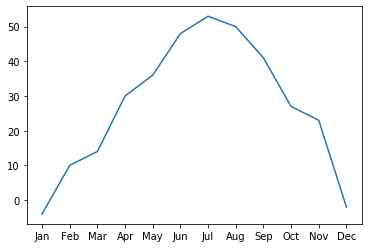

In [44]:
plt.plot([month for month in low_t],
         [min(low_t[month]) for month in low_t])

In [43]:
# We can also write a dictionary comprehension using the items() method
low_dict = { month: min(temps) for month, temps in low_t.items() }
print(low_dict)

{'Jan': -4.0, 'Feb': 10.0, 'Mar': 14.0, 'Apr': 30.0, 'May': 36.0, 'Jun': 48.0, 'Jul': 53.0, 'Aug': 50.0, 'Sep': 41.0, 'Oct': 27.0, 'Nov': 23.0, 'Dec': -2.0}


In [45]:
# We can use a filtering expression... Which months never fell below freezing?
no_freeze = [ month for month in low_t if min(low_t[month]) > 32 ]
print(no_freeze)

['May', 'Jun', 'Jul', 'Aug', 'Sep']


Generator expressions
---
A generator expression does what a list comprehension does, only it never populates a list. It just yields up results.

In [46]:
for j in (i * i for i in input_list):
    print(j)

81
16
64
0
484
1
49
16
81
0


In [50]:
ssq = sum(i * i for i in input_list)
print(ssq)

792


Let's go back to Moby-Dick...

In [47]:
# Count the words (parentheses mark a generator expression)
sum( ( 1 for w in words('moby-dick.txt') ) )

211832

In [48]:
# Shorthand way in a function call
sum(1 for w in words('moby-dick.txt'))

211832

In [49]:
# Count the 'the's
sum(1 for w in words('moby-dick.txt') if w == 'the')

14051

Sorting sequences
---

Let's look at some sorting applications and the `sorted` generator.

In [57]:
input_list = [-9, -4, 8, 0, 22, -1, 7, -4, 9, 0,]
label_list = ['A', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
world_series_winners = {
              2014: 'Giants',
              2015: 'Royals',
              2002: 'Angels',
              2016: 'Cubs',
              2009: 'Yankees',
              2017: 'Astros',
              2011: 'Cardinals',
              2018: 'Red Sox',
              2019: 'Nationals',
              1988: 'Dodgers',
              2001: 'Diamondbacks',
              }

In [51]:
input_list

[-9, -4, 8, 0, 22, -1, 7, -4, 9, 0]

In [54]:
# the sort() function sorts a sequence IN PLACE
input_list.sort()

In [55]:
input_list

[-9, -4, -4, -1, 0, 0, 7, 8, 9, 22]

In [58]:
# There's a generator called 'sorted' that generates an ordered sequence from a sequence
# but never builds a list

for i in sorted(input_list):
    print(i)

-9
-4
-4
-1
0
0
7
8
9
22


In [59]:
input_list

[-9, -4, 8, 0, 22, -1, 7, -4, 9, 0]

In [60]:
world_series_winners

{2014: 'Giants',
 2015: 'Royals',
 2002: 'Angels',
 2016: 'Cubs',
 2009: 'Yankees',
 2017: 'Astros',
 2011: 'Cardinals',
 2018: 'Red Sox',
 2019: 'Nationals',
 1988: 'Dodgers',
 2001: 'Diamondbacks'}

In [62]:
for i in sorted(world_series_winners):
    print(i, world_series_winners[i])

1988 Dodgers
2001 Diamondbacks
2002 Angels
2009 Yankees
2011 Cardinals
2014 Giants
2015 Royals
2016 Cubs
2017 Astros
2018 Red Sox
2019 Nationals


In [64]:
for w in reversed(sorted(set(words('moby-dick.txt')))):
    print(w)

”
‘you
‘yes
‘wise
‘will
‘why
‘whos
‘where
‘whats
‘what
‘well
‘we
‘vomited
‘very
‘turn
‘thunder
‘though
‘thou
‘this
‘theres
‘there
‘then
‘the
‘that
‘take
‘straight
‘stop
‘st
‘soon
‘so
‘sink
‘shut
‘shall
‘say
‘right
‘proceed
‘point
‘out
‘our
‘oh
‘no
‘nay
‘my
‘mr
‘moby
‘look
‘lively
‘like
‘lets
‘let
‘lakeman
‘its
‘it
‘is
‘into
‘in
‘im
‘ill
‘i
‘how
‘here
‘he
‘halloa
‘for
‘excuse
‘down
‘damn
‘cross
‘come
‘canallers
‘but
‘better
‘best
‘aye
‘are
‘and
‘also
‘adios
‘a
æsthetics
æsthetically
£150
£1000000
£100000
zoroaster
zoology
zones
zoned
zone
zogranda
zodiac
zig
zeuglodon
zephyr
zealanders
zealand
zeal
zay
zag
you”
youve
youthful
youth
yourselves”
yourselves
yourself”
yourself
yourselbs
yours
youre
your
youngish
youngest
younger
young
youll
youd
you
yorkshire
york
yore
yonder
yon
yoking
yokes
yoked
yoke
yojos
yojo
yields
yielding
yielded
yield
ye”
yeve
yet”
yet
yes”
yesterday”
yesterdays
yesterday
yes
yere
yells
yellowish
yellow
yelling
yelled
yell
yeast
years)
years
yearly
year
yea
ye
yawn

tempered
temperature
temperate
temperance
temper
tell”
tells
telling”
telling
tellin
tellest
tell
telescope
telegraph
tekel
teeth
teetering
teeter
teenth
tee
tedious
technicals
technically
technical
teats
tears
tearlessness
tearless
tearingly
tearin
tear
teak”
teak
teachings
teaches
teach
tea
te
tawny
tawn
taurus
taunts
tauntings
tauntingly
taught
tattooings
tattooing
tattooed
tattoo
tatters
tattered
tat
tasting
tastin
tastes
tastefully
tasted
taste
tassels
tasselled
tasseled
tasks
task
tash”
tashtegos
tashtego
tash
tarts
tartars
tartarian
tartarean
tartar
tarsus
tarshish
tars
tarried
tarred
tarquins
tarquin
tarpaulins
tarpaulin
tarnishing
tar
tap”
tapping
tapped
tapers
tapering
tapered
tape
tap
tantamount
tantalizing
tantalization
tanning
tanned
tangles
tangled
tangle
tandem
tanaquil
tamerlanes
tamely
tame
tambourine
talons
tall”
tally
tallow
tallies
tallied
tallest
taller”
tall
talks
talking
talkest
talked
talk
talisman
tales
tale
talbot
taking
takes
taken
take
tainted
tail”
tails
ta

ruggedness
ruggedest
rugged
rug
ruffles
ruffled
ruffed
ruefully
rueful
rue
rudimental
rudeness
rudely
rude
ruddy
rubies
rubbing
rubbed
rub
royalty
royalties
royals
royal
rows
rowlocks
rowing
rowels
rowed
row
roving
rover
routine
routed
route
rout
rousseau
rousing
rouses
roused
rouse
rounds
roundly
roundingly
rounding
rounder
rounded)
rounded
roundabout
round
roughly
rough
rotund
rotten
rotation
rot
rosy
rostrated
ross
rose”
roses
rose
ropeyarn
ropes
rope
roots
rooted
root
roosting
roomy
rooms
room
roofed
roof
roods
rondeletius
romish
romes
rome
romantic
romans
roman
roly
rolls
rollings
rolling
rollicking
rolled
roll
rokovoko
rogues
rogue
rogerss
rods”
rods
rod
rocky
rocks
rockings
rocking
rocket
rocked
rockaway
rock
robustness
robust
robes
robert
robed
robe
robbed
rob
roasted
roast
roaring
roared
roar
roanoke”
roanoke
road
riveted
rivet
rivers
river
rivals
rivallingly
rival
rituals
risks
risked
risk
rising”
risings
rising
rises)
rises
risen
rise)
rise
ript
rips
ripplingly
rippling
ripp

overtaking
overtakes
overtaken
overtake
overswarm
overstrained
overstocked”
overspreading
overspread
oversight
overshoes
overseeing
oversee
overscorning
oversailed
overruns
overrunningly
overrun
overruling
overpowered
overmuch
overmanned
overlording
overlooking
overlooked
overlook
overleap
overlays
overlapping
overlap
overladen
overhung
overhearing
overheard
overhead
overhanging
overgrowth
overgrowing
overflowing
overflowed
overdone
overdoing
overcome
overclouded
overburdening
overboard”
overboard
overbearing
overbalance
overawing
overawed
over)
over
oval
out”
outyell
outworks
outweigh
outwards
outwardly
outward
outstrip
outstretching
outstretched
outspreadingly
outspread
outskirts
outside
outset
outs
outright
outriders
outreaching
outran
outrageous
outraged
outrage
outnumber
outlines
outline
outlets
outlet
outlaws
outlast
outlandishness
outlandish
outfits
outfit
outermost
outer
outdone
outcries
outburst
outbranching
outblown
outbellying
out
oust
ourselves
ours
our
ounce
oughts
ought
o

kneepans
kneel”
kneeling
kneel
knee
knaves
kitten
kith
kitchen
kit
kissed
kiss
kinsmen
kink
king”
kings
kingly
kingdoms
kingdom
king
kine
kinds
kindred
kindness
kindly
kindling
kindled
kindle
kindhearted
kind
kin
kiln
kills
killing
killers
killer
killed”
killed)
killed
kill
kidnapping
kidnapped
kidnap
kicks
kicking
kicked
kick
khan
keystone
keys
keyed
key
kettles
kept
kentucky
kentuckian
kentledge
kennel”
kelson
kelpy
keg
keeps
keeping
keepers
keeper
keep
keenly
keenest
keener
keen
keels
keeling
keeled
keel
kee
kedron
kedger
kants
kannakin
ka
juvenile
justly
justinians
justinian
justify
justified
justification
justice
just
jury”
jury
jurisprudence
jurisdiction
jure
jupiter
junks
junk
junior
jungle
jungfrau
june
juncture
junction
jump”
jumping
jumped
jump
jumbled
julys
july
juicy
juices
juggling
jugglers
juggler
judith
judiciously
judicious
judgments
judgment
judgmatically
judging
judge”
judges
judge
judea
jubilations
juba
jub
juan
joyousness
joyously
joyous
joyfully
joyful
joy
jovial
j

fungi
funereally
funereal
funeral
fundamentals
fundamental
functions
functionary
function
fun
fumes
fumbling
fumbled
fully
fullest
fullers
fuller
full
fulfilment
fulfiller
fugitive
fuel
fuddled
fry
frustrate
fruits
fruition
fruit
frugal
frozen
froze
frowned
frothed
frosty
frosts
frosted
frost
fronts)
fronts
fronting
frontiers
frontier
front
from
frolic
froissart
frogs
frocks
frock
frobisher
fro
fritters”
fritters
frisky
fringing
fringed
frigid
frights
frightful
frightens
frightened
frighten
frighted
fright
frigates
frigate
friesland
friend”
friendship
friends
friendly
friendliness
friend
friction
friar
freshness
freshly
freshets
freshet
fresher
freshening
freshened
fresh)
fresh
frequently
frequented
frequent
frequency
frenzy
frenzies
frenzied
frenchmen
frenchmans
frenchman
french
freighted
freight
freezing
freeze
freewill
freer
freely
freedom
freed
freebooting
freebooters
free
frederick
freckles
freckled
frayed
fray
fraternity
frantic
frankly
franklin
frankincense
frankfort
frank
franc

denote
denominating
denominated
denominate
denizens
denizen
denied
denials
denderah
den
demselves”
demonstrations
demonstrate
demonstrable
demonisms
demonism
demoniac
demon
democratic
democrat
democracy
demijohn
demigorgon
demigods
demigod
demi
demeanor
demands
demanding
demanded
demand
delusions
delusion
deluge
delude
delta
delivery
deliverer
delivered
deliverance
deliver
deliriums
delirium
deliriously
delirious
delineations
delineate
delights
delightfully
delightful
delighted
delight
deliciousness
delicious
delicately
delicate
delicacy
deliberating
deliberately
deliberated
deliberate
delegated
delectable
delay
del
dejected
deity
deified
degrees
degree
degenerated
defyingly
defy
defunct
deftly
defray
deformity
deformities
deformed
definition
defined
define
defiles
defilements
defile
defied
deficiency
deficiencies
defiance
deferential
defendants
defence
defection
defaced
deer
deeps
deeply
deepest
deeper
deepeningly
deepening
deep*
deep
deemed
deem
deeds
deed
deduction
dedication
dedica

brained
brain
braiding
braided
brahmins
brahma
brags
brag
bracton
brackish
brack
bracing
braces”
braces
braced
brace)
brace
boy”
boys”
boys)”
boys)
boys
boyhoods
boy
boxing
boxes”
boxes
box
bowstring
bowsprit
bowsmen
bowsman
bows
bowls
bowling
bowlines
bowline
bowled
bowl
bowings
bowing
bowie
bower
bowels
bowed
bowditchs
bowditch
bow
bouton
bout
bourbons
bountifully
bountiful
bounties
bounteous
bound”
bounds
boundless
bounding
bounder
bounded
boundary
bound
bouncing
bounced
bounce
bought
boughs
bough
bottomless
bottomed
bottom)
bottom
bottling
bottles
bottled
bottle
both”
both
boston
bosoms
bosom
bosky
borrowing
borrowed
borrow
born”
borneo
borne
born
bored
borean
bore
borders
bordering
bordered
border
bordeaux
boozy
boots”
boots
booting
boot
boone
boon
booms
booming
boomers
boomer
boomed
boom
books
bookbinders
book
booble
boobies
bony
bonnet”
bonneterre
bonnet
bones
boneless
bone
bondsman
bond
bonapartes
bon
bombazine
bombay
bomb
bolts
bolting
bolted
bolt
bolstering
bolivia
boldness
b